In [39]:
# Description: This program uses the dual moving average crossover to determine when to buy and sell stock
# https://www.youtube.com/watch?v=SEQbb8w7VTw

In [40]:
# Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [41]:
# Load the data
!pip install quandl
import quandl
mydata = quandl.get("WIKI/AAPL")

In [42]:
# Store the data
AAPL = mydata[-2000:] # Only get 2000 recent days data for convenient
# Show the data
AAPL

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-04-15,245.780,249.03,245.510,248.920,13456600.0,0.0,1.0,31.586156,32.003826,31.551457,31.989689,94196200.0
2010-04-16,248.570,251.14,244.550,247.400,26805200.0,0.0,1.0,31.944709,32.274990,31.428083,31.794348,187636400.0
2010-04-19,247.030,247.89,241.770,247.070,20247300.0,0.0,1.0,31.746798,31.857320,31.070815,31.751939,141731100.0
2010-04-20,248.540,249.25,242.955,244.590,26368800.0,0.0,1.0,31.940854,32.032099,31.223104,31.433224,184581600.0
2010-04-21,258.805,260.25,255.730,259.220,35085400.0,0.0,1.0,33.260050,33.445752,32.864869,33.313383,245597800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.040,175.09,171.260,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.000,172.68,168.600,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.390,169.92,164.940,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


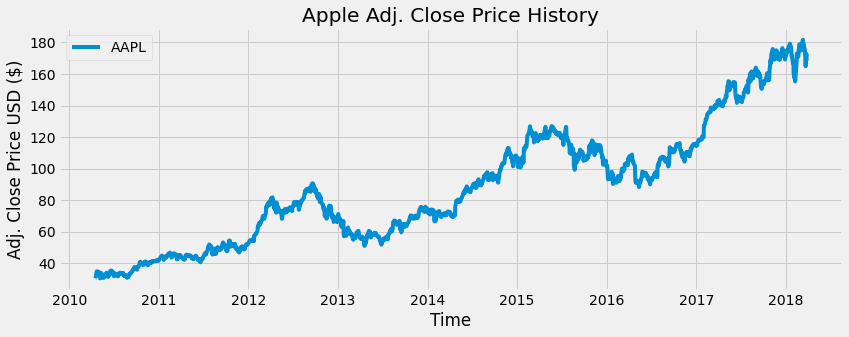

In [43]:
# Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj. Close'], label='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Time')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [44]:
# Create the simple moving average with a 30 days window
SMA30 = pd.DataFrame()
SMA30['Adj. Close'] = AAPL['Adj. Close'].rolling(window=30).mean()
SMA30

,Adj. Close
2010-04-15,NaN
2010-04-16,NaN
2010-04-19,NaN
2010-04-20,NaN
2010-04-21,NaN
...,...
2018-03-21,173.082833
2018-03-22,173.393000
2018-03-23,173.713667
2018-03-26,174.273667


In [45]:
# Create the simple moving average with a 100 days window
SMA100 = pd.DataFrame()
SMA100['Adj. Close'] = AAPL['Adj. Close'].rolling(window=100).mean()
SMA100

,Adj. Close
2010-04-15,NaN
2010-04-16,NaN
2010-04-19,NaN
2010-04-20,NaN
2010-04-21,NaN
...,...
2018-03-21,171.90042
2018-03-22,172.02482
2018-03-23,172.10012
2018-03-26,172.19732


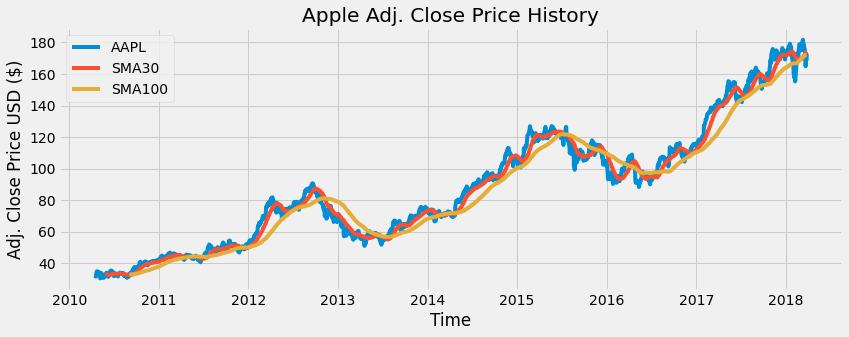

In [46]:
# Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj. Close'], label='AAPL')
plt.plot(SMA30['Adj. Close'], label='SMA30')
plt.plot(SMA100['Adj. Close'], label='SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Time')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [47]:
# Create new dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj. Close']
data['SMA30'] = SMA30['Adj. Close']
data['SMA100'] = SMA100['Adj. Close']
data

,AAPL,SMA30,SMA100
2010-04-15,31.989689,NaN,NaN
2010-04-16,31.794348,NaN,NaN
2010-04-19,31.751939,NaN,NaN
2010-04-20,31.433224,NaN,NaN
2010-04-21,33.313383,NaN,NaN
...,...,...,...
2018-03-21,171.270000,173.082833,171.90042
2018-03-22,168.845000,173.393000,172.02482
2018-03-23,164.940000,173.713667,172.10012
2018-03-26,172.770000,174.273667,172.19732


In [48]:
# Create a function to signal when to buy and sell stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        flag = 1
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        flag = 0
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [49]:
# Store buy and sell data into variables
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [50]:
# Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
2010-04-15,31.989689,NaN,NaN,NaN,NaN
2010-04-16,31.794348,NaN,NaN,NaN,NaN
2010-04-19,31.751939,NaN,NaN,NaN,NaN
2010-04-20,31.433224,NaN,NaN,NaN,NaN
2010-04-21,33.313383,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-03-21,171.270000,173.082833,171.90042,NaN,NaN
2018-03-22,168.845000,173.393000,172.02482,NaN,NaN
2018-03-23,164.940000,173.713667,172.10012,NaN,NaN
2018-03-26,172.770000,174.273667,172.19732,NaN,NaN


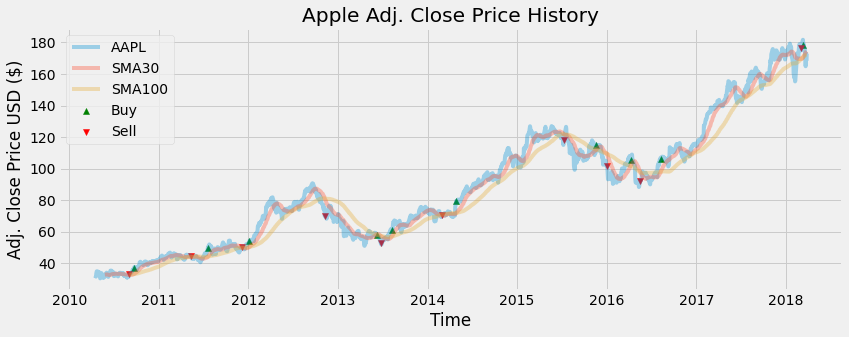

In [51]:
# Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj. Close'], label='AAPL', alpha=0.35)
plt.plot(SMA30['Adj. Close'], label='SMA30', alpha=0.35)
plt.plot(SMA100['Adj. Close'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Time')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()